In [ ]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#conexão com o banco de dados
conexao = mysql.connector.connect(
    host = 'localhost',
    user ='root',
    password = 'casa123456',
    database = 'minhas_corridas'
)


query = "SELECT distancia,data_corrida FROM corridas"


df = pd.read_sql(query, conexao)
conexao.close()


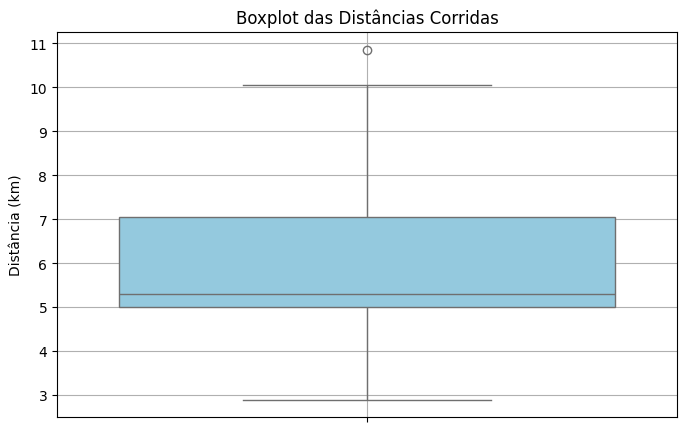

In [ ]:
# Boxplot das Distâncias

plt.figure(figsize=(8,5))
sns.boxplot(y=df['distancia'], color='skyblue')
plt.title('Boxplot das Distâncias Corridas')
plt.ylabel('Distância (km)')
plt.grid(True)
plt.show()


In [ ]:
conexao = mysql.connector.connect(
    host = 'localhost',
    user ='root',
    password = 'casa123456',
    database = 'minhas_corridas'
)

# calcula os didas de descanço entre corridas e filtra os descanso até no maximo 10 dias
query = "SELECT * FROM (SELECT distancia,DATEDIFF(data_corrida, LAG(data_corrida) OVER (ORDER BY data_corrida)) AS dias_descanso FROM corridas) AS sub WHERE dias_descanso <= 10"


dados = pd.read_sql(query, conexao)
conexao.close()

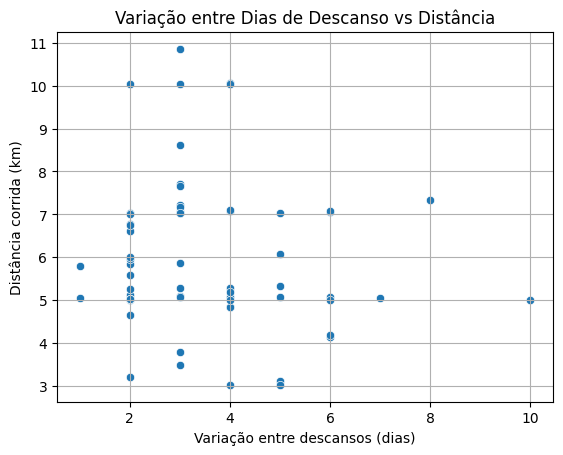

In [ ]:
# Gráfico de correlação de dias de descanso de cada corrida suas distâncias

sns.scatterplot(x='dias_descanso', y='distancia', data=dados)
plt.title('Variação entre Dias de Descanso vs Distância')
plt.xlabel('Variação entre descansos (dias)')
plt.ylabel('Distância corrida (km)')
plt.grid(True)
plt.show()

In [ ]:
# Arredondando as distâncias
dados['km_arredondado'] = dados['distancia'].round()
medias = dados.groupby('km_arredondado')['dias_descanso'].mean().round(2)
medias


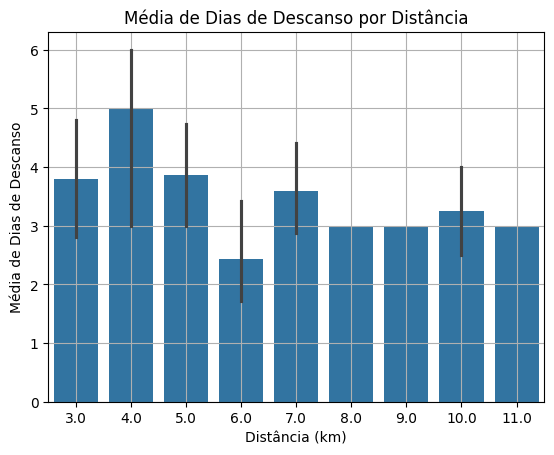

In [ ]:
# Griafico com as médias de descanso oagrupada por kilômetro

sns.barplot(data=dados, x='km_arredondado', y='dias_descanso', estimator='mean')
plt.title('Média de Dias de Descanso por Distância')
plt.ylabel('Média de Dias de Descanso')
plt.xlabel('Distância (km)')
plt.grid(True)
plt.show()


In [ ]:
conexao = mysql.connector.connect(
    host = 'localhost',
    user ='root',
    password = 'casa123456',
    database = 'minhas_corridas'
)


query = "SELECT ritmo_medio,umidade,data_corrida,velocidade_media FROM corridas"


dados = pd.read_sql(query, conexao)
conexao.close()

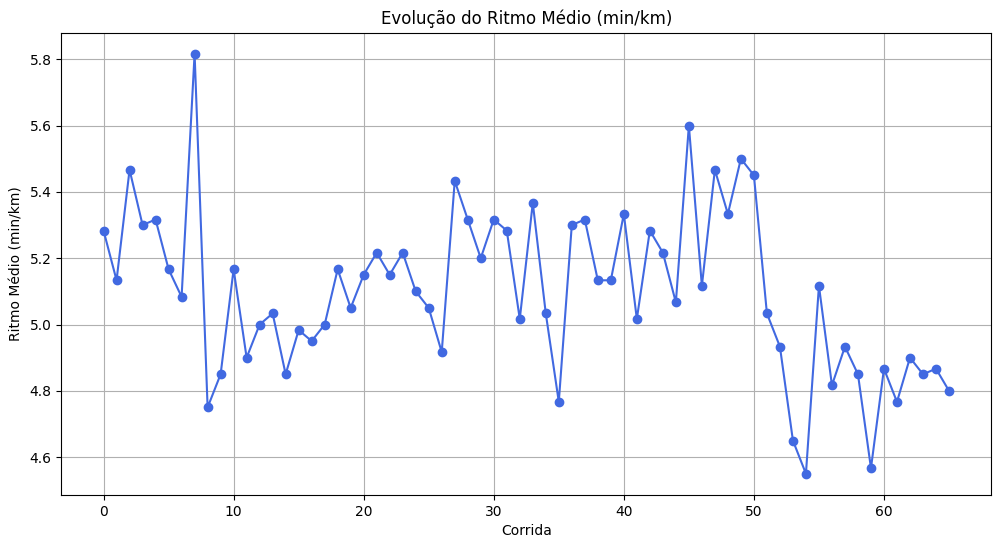

In [ ]:

dados['ritmo_medio'] = pd.to_timedelta(dados['ritmo_medio'])

dados['ritmo_min_km'] = dados['ritmo_medio'].dt.total_seconds() / 60

# Evolução do meu ritmo médio ao longo do tempo

plt.figure(figsize=(12,6))
plt.plot(dados['ritmo_min_km'], marker='o', linestyle='-', color='royalblue')
plt.title('Evolução do Ritmo Médio (min/km)')
plt.xlabel('Corrida')
plt.ylabel('Ritmo Médio (min/km)')
plt.grid(True)
plt.show()



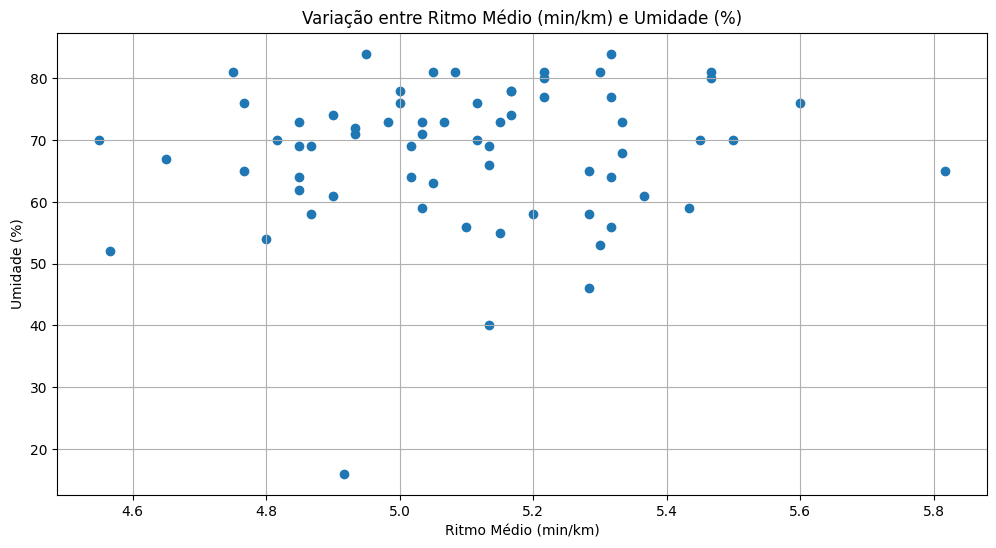

In [ ]:
dados['ritmo_min_km'] = dados['ritmo_medio'].dt.total_seconds() / 60

# Correlação do umidade e o ritmo no dia da corrida

plt.figure(figsize=(12,6))
plt.scatter(dados['ritmo_min_km'], dados['umidade'])
plt.title('Variação entre Ritmo Médio (min/km) e Umidade (%)')
plt.xlabel('Ritmo Médio (min/km)')
plt.ylabel('Umidade (%)')
plt.grid(True)
plt.show()

